In [1]:
from dotenv import load_dotenv
import os
load_dotenv()

os.environ['GROQ_API_KEY'] = os.getenv('GROQ_API_KEY' )


In [ ]:
from langchain_core.messages import AIMessage, HumanMessage
from pprint import pprint
import pprint
messages=[AIMessage(content=f"Please tell me how can I help",name="LLMModel")]
messages.append(HumanMessage(content=f"I want to learn coding",name="vibhav"))
messages.append(AIMessage(content=f"Which programming language you want to learn",name="LLMModel"))
messages.append(HumanMessage(content=f"I want to learn python programming language",name="vibhav"))

for message in messages:
    message.pretty_print()


================================== Ai Message ==================================
Name: LLMModel

Please tell me how can I help
================================ Human Message =================================
Name: vibhav

I want to learn coding
================================== Ai Message ==================================
Name: LLMModel

Which programming language you want to learn
================================ Human Message =================================
Name: vibhav

I want to learn python programming language


In [3]:
from langchain_groq import ChatGroq
llm = ChatGroq(model="qwen-qwq-32b")
result = llm.invoke(messages)

In [4]:
result.response_metadata

{'token_usage': {'completion_tokens': 1896,
  'prompt_tokens': 56,
  'total_tokens': 1952,
  'completion_time': 4.382480896,
  'prompt_time': 0.004850075,
  'queue_time': 0.264910314,
  'total_time': 4.387330971},
 'model_name': 'qwen-qwq-32b',
 'system_fingerprint': 'fp_a91d9c2cfb',
 'finish_reason': 'stop',
 'logprobs': None}

In [5]:
result

AIMessage(content='\n<think>\nOkay, the user wants to learn Python. Let me start by breaking down the best way to approach this. First, I should outline the steps a beginner would take. I remember when I was starting out, having a clear path helped me stay focused.\n\nThey might not know where to start, so I should suggest setting clear goals. Maybe they have a specific project in mind, like web development or data analysis. That would help them stay motivated. But if they\'re just starting, maybe they need some general guidance.\n\nNext, they\'ll need a development environment. I should mention Python\'s official website for installation. Also, IDEs like PyCharm or VS Code are common. Jupyter Notebooks could be useful too, especially for data science.\n\nThen, the learning resources. Free platforms like Codecademy and freeCodeCamp are good entry points. Books like "Automate the Boring Stuff" are practical. Online courses on Coursera and Udemy might be options too. I should list a few 

In [6]:
def add(a:int,b:int)-> int:
    """ Add a and b
    Args:
        a (int): first int
        b (int): second int

    Returns:
        int
    """
    return a+b

In [7]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000023741058E90>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000002374105B140>, model_name='qwen-qwq-32b', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [8]:
llm_with_tools = llm.bind_tools([add])
tool_call = llm_with_tools.invoke([HumanMessage(content =f"what is 2 plus 2", name='vibhav')])

In [9]:
tool_call
print(tool_call.tool_calls)

[{'name': 'add', 'args': {'a': 2, 'b': 2}, 'id': 'awppfmhj2', 'type': 'tool_call'}]


In [10]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage

# class State(TypedDict):
#     message:list[AnyMessage]

In [11]:
from langgraph.graph.message import add_messages
from typing import Annotated

class State(TypedDict):
    messages: Annotated[list[AnyMessage],add_messages]

In [12]:
initial_messages=[AIMessage(content=f"Please tell me how can I help",name="LLMModel")]
initial_messages.append(HumanMessage(content=f"I want to learn coding",name="vibhav"))
initial_messages

[AIMessage(content='Please tell me how can I help', additional_kwargs={}, response_metadata={}, name='LLMModel'),
 HumanMessage(content='I want to learn coding', additional_kwargs={}, response_metadata={}, name='vibhav')]

In [13]:
ai_message=AIMessage(content=f"Which programming language you want to learn",name="LLMModel")
ai_message

AIMessage(content='Which programming language you want to learn', additional_kwargs={}, response_metadata={}, name='LLMModel')

In [14]:
add_messages(initial_messages, ai_message)

[AIMessage(content='Please tell me how can I help', additional_kwargs={}, response_metadata={}, name='LLMModel', id='27848c19-ac65-49bf-92d3-ebb776d4905d'),
 HumanMessage(content='I want to learn coding', additional_kwargs={}, response_metadata={}, name='vibhav', id='af131d5d-2f55-4fd5-a95a-2f22e1bd1b0e'),
 AIMessage(content='Which programming language you want to learn', additional_kwargs={}, response_metadata={}, name='LLMModel', id='57db2991-c2fe-44ee-9fd5-882852a9d55c')]

In [15]:
def llm_tool(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

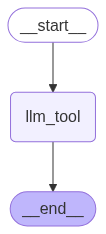

In [16]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
builder=StateGraph(State)

builder.add_node("llm_tool",llm_tool)

builder.add_edge(START,"llm_tool")
builder.add_edge("llm_tool",END)

graph=builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
messages=graph.invoke({"messages":"What is 2 plus 2"})

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

What is 2 plus 2
================================== Ai Message ==================================
Tool Calls:
  add (k6bc6qhzk)
 Call ID: k6bc6qhzk
  Args:
    a: 2
    b: 2


In [18]:
tools = [add]

In [19]:
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition


builder=StateGraph(State)

## Add nodes

builder.add_node("llm_tool",llm_tool)
builder.add_node("tools",ToolNode(tools))

## Add Edge
builder.add_edge(START,"llm_tool")
builder.add_conditional_edges("llm_tool",tools_condition)
builder.add_edge("tools",END)


graph_builder = builder.compile()



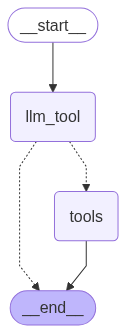

In [20]:
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [21]:
## invocation

messages=graph_builder.invoke({"messages":"What is 2 plus 2"})

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

What is 2 plus 2
================================== Ai Message ==================================
Tool Calls:
  add (4vtrzsswt)
 Call ID: 4vtrzsswt
  Args:
    a: 2
    b: 2
================================= Tool Message =================================
Name: add

4


In [22]:
messages=graph_builder.invoke({"messages":"What Machine Learning"})

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

What Machine Learning
================================== Ai Message ==================================

Machine Learning (ML) is a subset of Artificial Intelligence (AI) that focuses on developing algorithms and statistical models enabling computers to improve their performance at specific tasks through experience. Instead of being explicitly programmed, ML systems learn patterns from data and make predictions or decisions.

### Key Concepts:
1. **Supervised Learning**: Uses labeled data to train models (e.g., predicting house prices based on historical data).
2. **Unsupervised Learning**: Finds hidden patterns in unlabeled data (e.g., customer segmentation).
3. **Reinforcement Learning**: Learns by trial-and-error via rewards/penalties in an environment (e.g., game-playing AI).

### Common Applications:
- Image/speech recognition
- Recommendation systems (e.g., Netflix, Spotify)
- Spam detection
- Self-d